# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

# Цель проекта

В первой части проекта необходимо приоритезировать гипотезы и сделать выводы на основе двух методов приоритезации.

Во второй части проекта - провожу анализ А/В тестирования. Необходимо определить статистическую значимость в среднем количестве заказов и среднем чеке между группами. На основе этих данных, сделать вывод.

# Структура проекта

Последовательность выполнения проекта:
- Приоритизируем гипотезы
- Изучим общую информацию данных по А/В тестированию
- Выполним предобработку данных
- Исследовательский анализ даных
- Проверка гипотез
- Сделаем общий вывод по исследованию

## Приоритезация гипотез

### Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Чтение файла

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

### Знакомство с данными

In [3]:
pd.options.display.max_colwidth = 130
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В данных всего 9 гипотез. 
- Приведу названия стобцов к нижнему регистру.
- Пропусков в таблице нет - можно приступать к приоритезации.

In [4]:
data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

###  Применяю фреймворк ICE для приоритизации

In [5]:
data['ice_score'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)
data_ice = data[['hypothesis', 'ice_score']].sort_values(by = 'ice_score', ascending = False)
data_ice

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


При выборе метода приоритезации ICE, лидерами оказались следующие гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

###  Применяю фреймворк RICE для приоритизации

In [6]:
data['rice_score'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
data_rice = data[['hypothesis', 'rice_score']].sort_values(by = 'rice_score', ascending = False)
data_rice

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При выборе метода приоритизации RICE, лидерами оказались следующие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Вывод

При изменении метода приоритизации, лидеры поменялись. Например, гипотеза о том, что нужно запустить акцию, дающую скидку на товар в день рождения, вообще исчезла из нашего списка. 
Это произошло, так как в методе RICE мы обращаемся к дополнительному параметру reach - он показывает охват аудитории, которую затронет нововведение. Так как данная гипотеза с парметром reach равным 1, она затронет минимальное колличество пользователей, поэтому опустилась вниз рейтинга. 

Определил, что приоритетными гипотезами являются:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

# Анализ A/B-теста

## Чтение файлов и просмотр общей информации

### Чтение файлов

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

### Знакомство с данными

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


- Пропусков нет.
- Столбцы дат в формате int64, необходимо изменить на нужный формат.

## Предобработка данных

### Приведу столбцы дат к нужному типу

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Проверю данные на наличие дубликатов

In [11]:
print('Кол-во дубликатов в таблице orders равно', orders.duplicated().sum())
print('Кол-во дубликатов в таблице visitors равно', visitors.duplicated().sum())

Кол-во дубликатов в таблице orders равно 0
Кол-во дубликатов в таблице visitors равно 0


### Посмотрю на количество групп тестирования и распределение покупателей

In [12]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

### Определю даты начала и окончания тестирования

In [13]:
print('Начальная дата проведения теста', orders['date'].min())
print('Конечная дата проведения теста', orders['date'].max())

Начальная дата проведения теста 2019-08-01 00:00:00
Конечная дата проведения теста 2019-08-31 00:00:00


Провел предобработку данных:
- Привел столбцы с датами к нужному типу
- Выполнил проверку на дубликаты - явных дубликатов нет
- Определил количество групп тестирования. В данных две группы - А и В. В группе В покупателей больше - 640 против 557.
- Определил минимальную и максимальную даты проведения теста. Тест продится с 1 августа 2019 по 31 августа 2019.

## Исследовательский анализ данных

### Построю график кумулятивной выручки по группам

#### Расчет кумулятивной выручки

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#### Построение графика

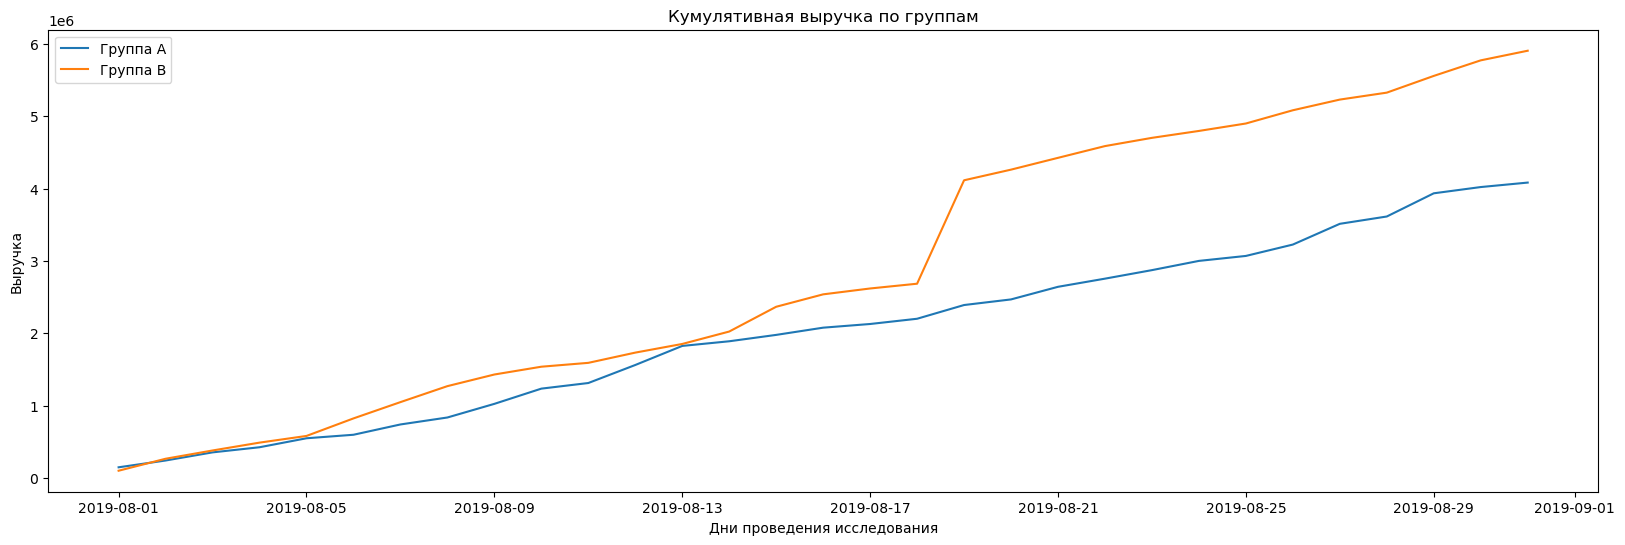

In [32]:
plt.subplots(figsize = (20,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.legend(['Группа А', 'Группа В'])
plt.xlabel('Дни проведения исследования')
plt.ylabel('Выручка')
plt.show()

Группа В лидирует по выручке.

Обе группы показывают одинаковый рост выручки, однако на 20 день у группы В был резкий рост - возможно, что это либо всплеск числа заказов, либо был сделан очень дорогой заказ.

### Построю график кумулятивного среднего чека по группам

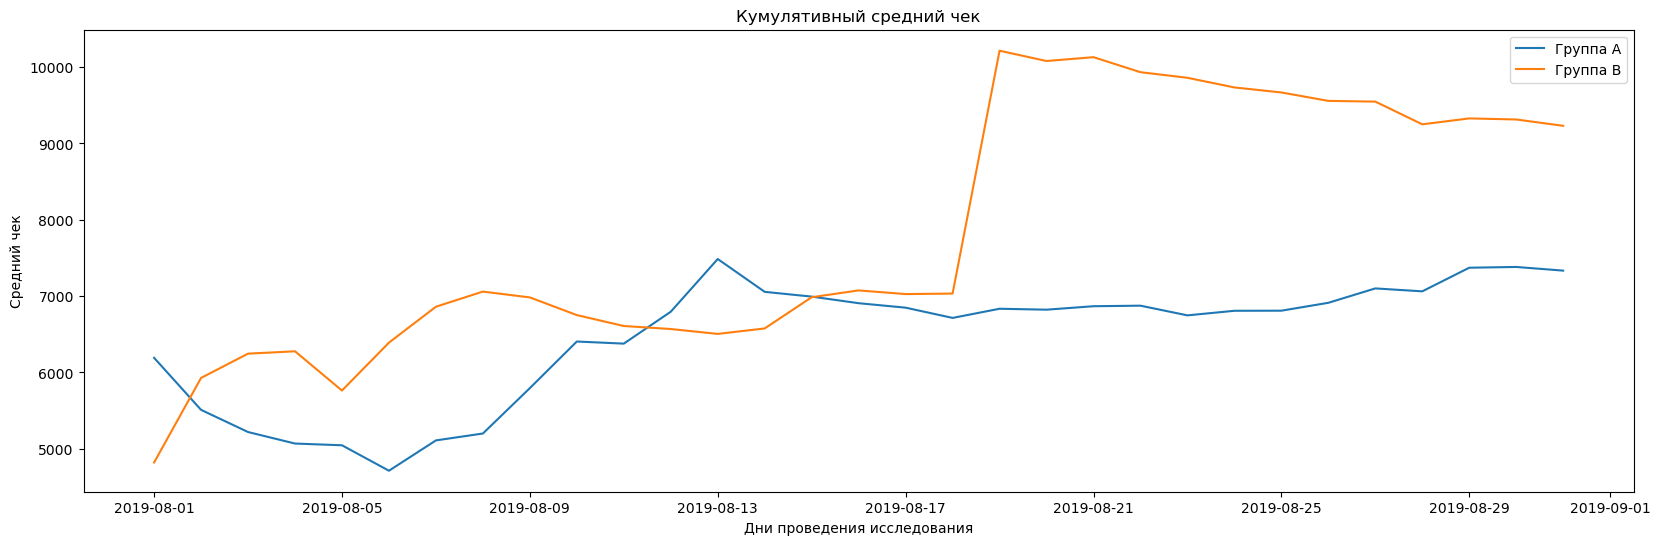

In [33]:
plt.subplots(figsize = (20,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек')
plt.legend(['Группа А', 'Группа В'])
plt.xlabel('Дни проведения исследования')
plt.ylabel('Средний чек')
plt.show()

Средний чек лидирует у группы В.

Группа А показывает рост среднего чека, у группы В средний чек опускается, после резкого роста.

### Построю график относительного изменения кумулятивного среднего чека группы B к группе A

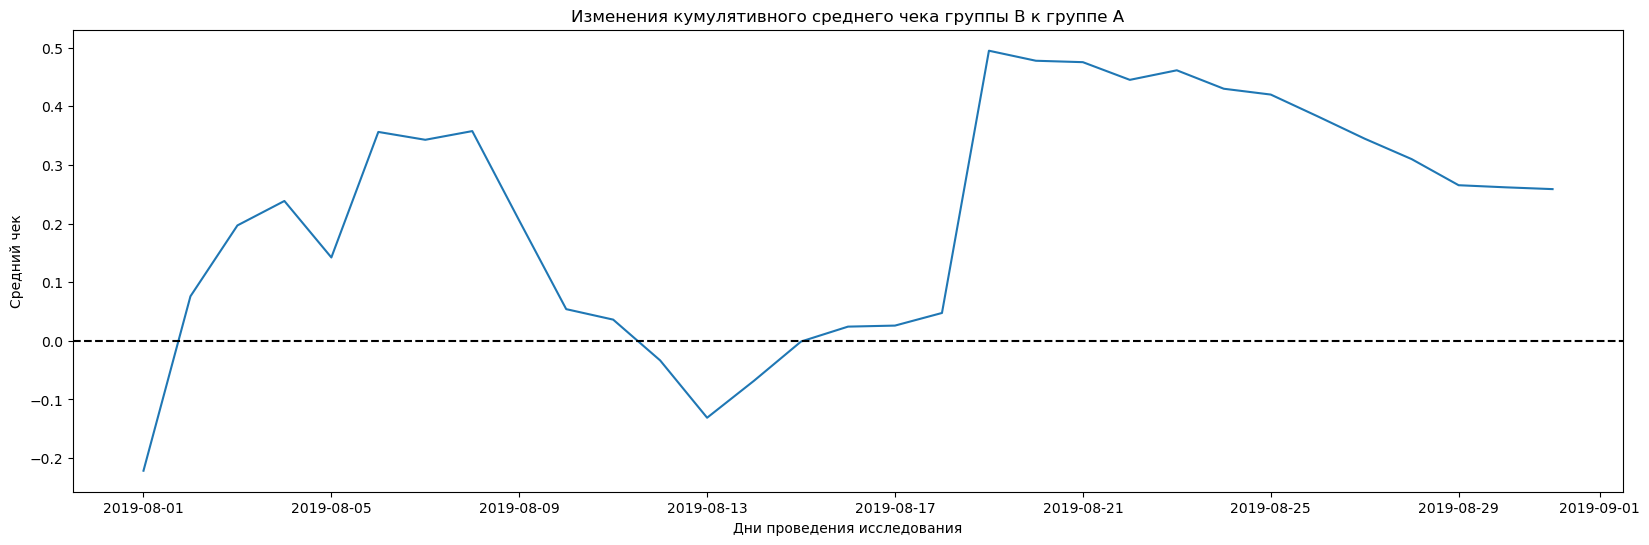

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.subplots(figsize = (20,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дни проведения исследования')
plt.ylabel('Средний чек')
plt.show()

На 20 день график резко вырос к группе В, значит я могу точно сказать, что в данный период группа В получила крупный заказ.

###  Построю график кумулятивного среднего количества заказов на посетителя по группам

#### Расчет кумулятивной конверсии и отделение данных по группам

In [18]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#### Построение графика

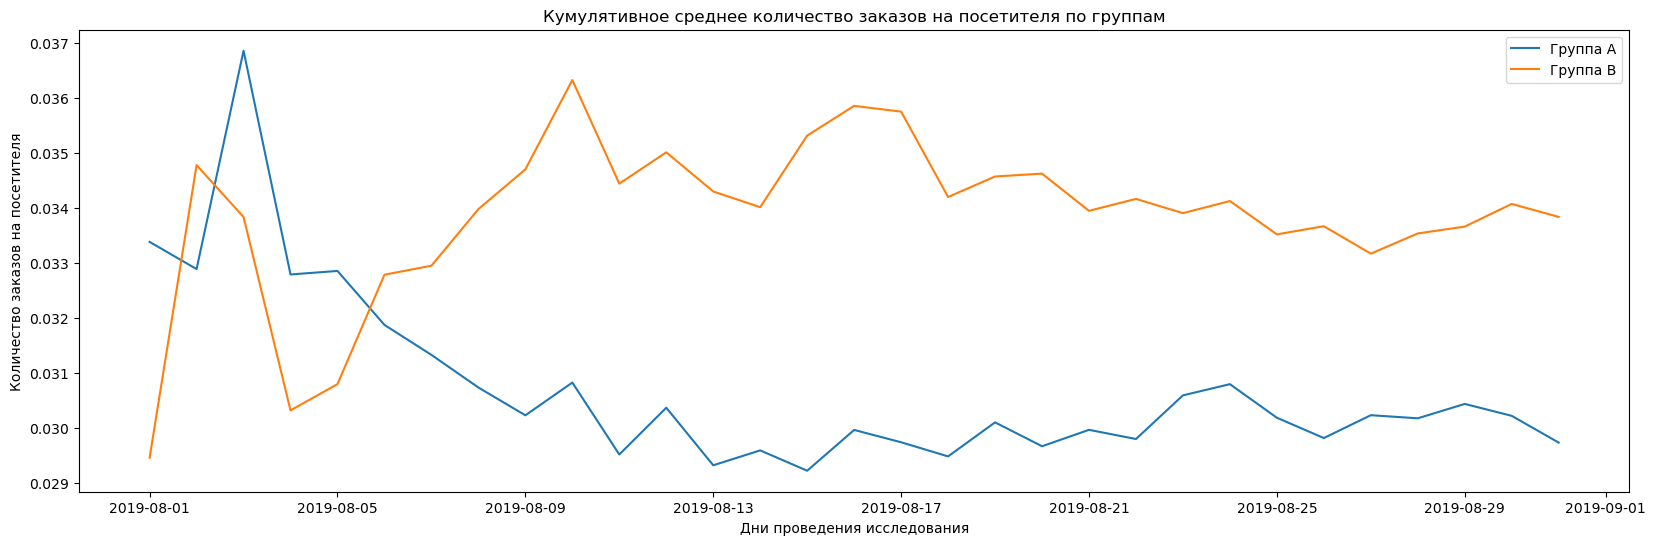

In [34]:
plt.subplots(figsize = (20,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['Группа А', 'Группа В'])
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дни проведения исследования')
plt.ylabel('Количество заказов на посетителя')
plt.show()

У обеих групп в начале исследования наблюдаются резкие скачки количества заказов. После группа А показывает равномерное падение среднего колличества заказов, а группа В после резкого падения, опередила группу А и продолжает лидировать.

### Построю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

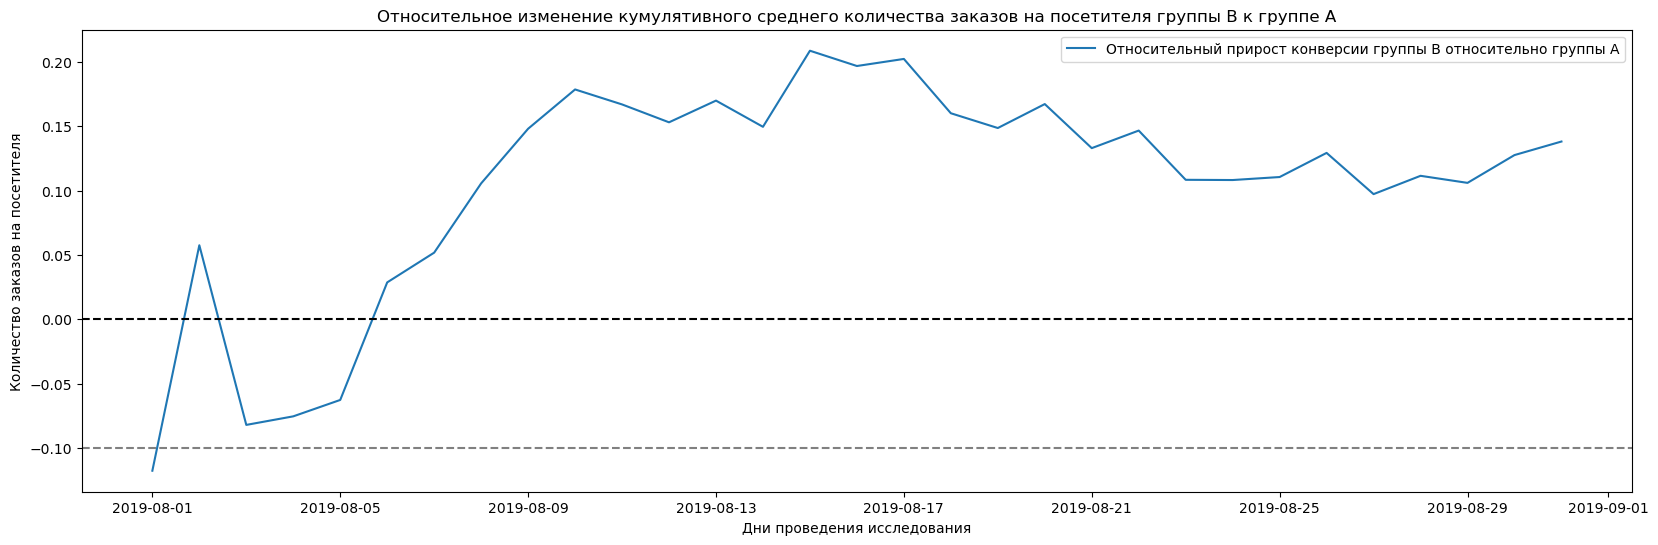

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.subplots(figsize = (20,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('Дни проведения исследования')
plt.ylabel('Количество заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

Конверсия группы В вначале вырвалась вперед, затем упала, затем снова вырвалась вперед и стабильно держится выше показателя группы А.

Нужно рассмотреть есть ли в данных аномалии.

### Построю точечный график количества заказов по пользователям

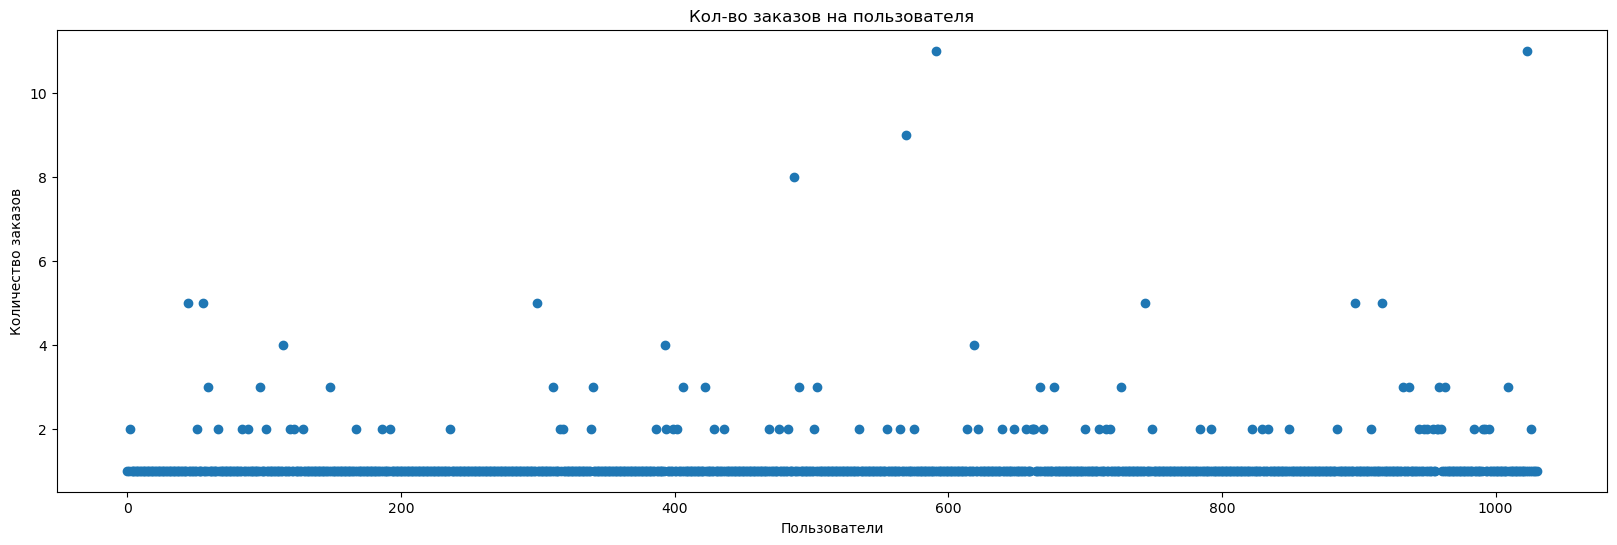

In [21]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.subplots(figsize = (20,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Кол-во заказов на пользователя')
plt.show()

Большинство пользователей оформили 1 заказ, меньшее число пользователей оформили до 5 заказов.

Болле 5 заказов встречаются крайне редко.

### Посчитаю 95-й и 99-й перцентили количества заказов на пользователя

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа.

1% пользователей оформили более 4 заказов.

Выбираю 2 заказа, как границу для определения анамольных пользователей.

### Построю точечный график стоимостей заказов

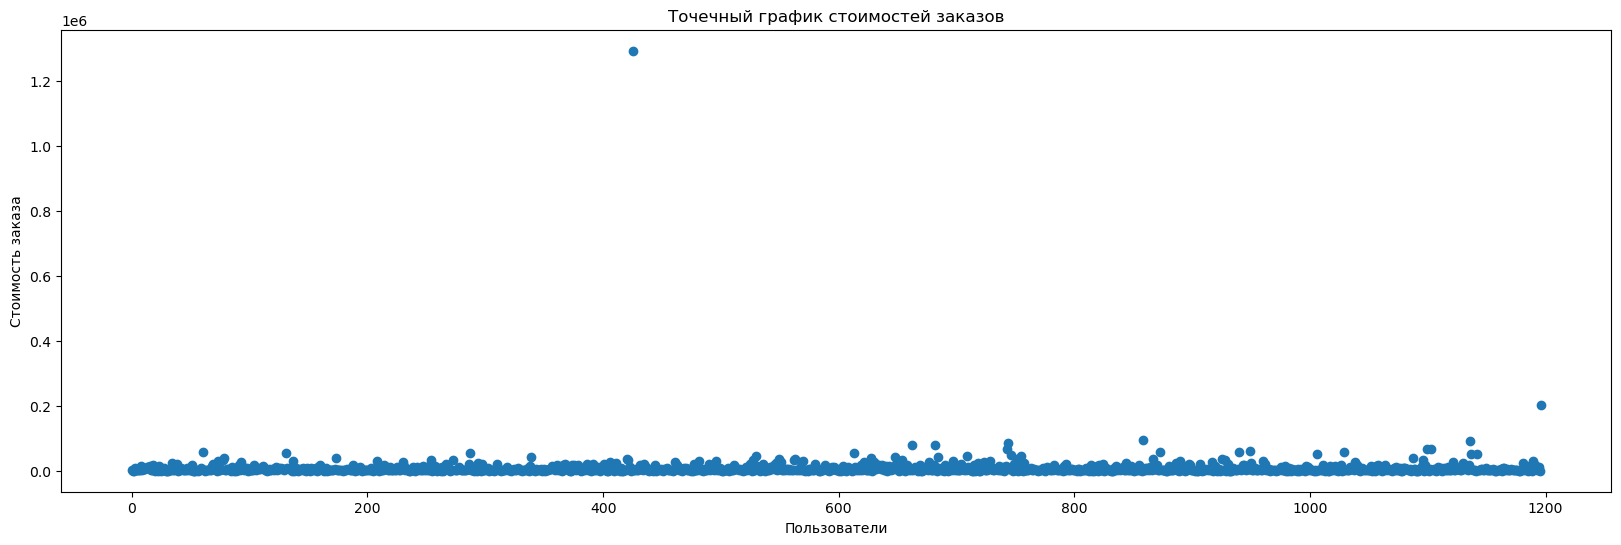

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.subplots(figsize = (20,6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.title('Точечный график стоимостей заказов')
plt.show()

В данных есть аномальные значения, сильно отличающиеся от остальных. Попробую задать лимит в 100 тысяч для стоимости заказа, чтобы ближе посмотреть на распределение данных большниства заказов.

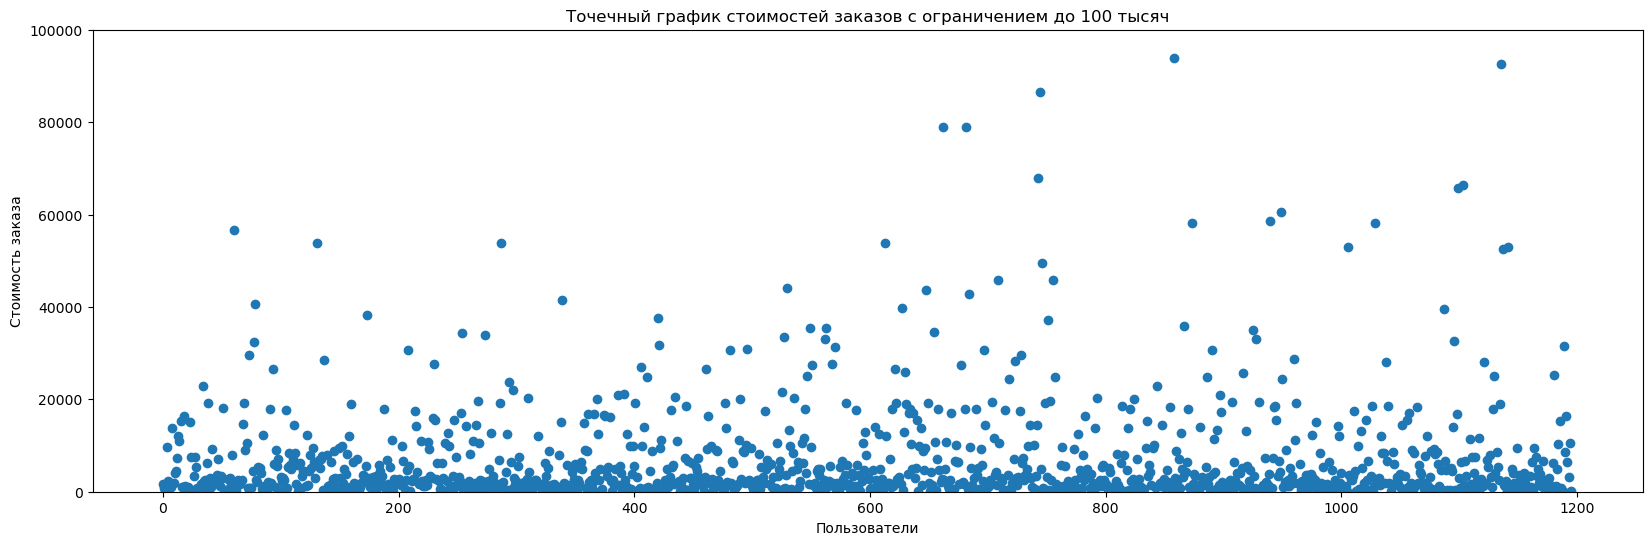

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.subplots(figsize = (20,6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.title('Точечный график стоимостей заказов с ограничением до 100 тысяч')
plt.show()

Большинство пользовотелей сделали заказы на сумму до 20 тысяч.

### Посчитаю 95-й и 99-й перцентили стоимости заказов. Выберу границу для определения аномальных заказов

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


5% пользователей оформили заказы на сумму больше 28 тысяч, лишь 1% пользователлей оформили заказы на сумму больше 58 тысяч.

Выбираю 28 тысяч, как границу для определения аномальных пользователе.

## Проверка гипотез

### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Н0: различий в среднем количестве заказов между группами нет

H1: различия в среднем количестве заказов между группами есть

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',]
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),],axis=0,)
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Разница групп:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Разница групп: 0.138


p-value меньше 0.05, значит нулевую гипотезу можно отвергнуть, различия в среднем количестве заказов между группами могут быть.

Отрыв группы В почти 14%.

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

H0: различий в среднем чеке между группами нет

H1: различия в среднем чеке между группами есть

In [39]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница групп:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Разница групп: 0.259


p-value значительно больше 0.05, значит причин отвергать нулевую гипотезу нет.

Средний чек группы В значительно больше, чем у группы А - около 26%.

Поскольку относительное различие среднего чека между сегментами составляет 26%, наблюдаемые различия не являются значимыми при таком уровне статистической значимости, следовательно были получены случайно.

### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

#### Очищаю данные от аномальных значений

In [28]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
     ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Исключаю пользователей с числом заказов от 3.

Исключаю пользователей оформивших заказ дороже 28 тысяч.

Всего 74 аномальных пользователя.

#### Считаю статистическую значимость

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница групп:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013
Разница групп: 0.173


Убрав аномальных пользователей - результат почти изменился.

P-value уменьшился на 0.004. Он по прежнему меньше 0.05, значит, что нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет, можно отвергнуть. 

Отрыв группы В увеличился с 14% до 17%.

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [44]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))
print('Разница групп:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

p-value: 0.738
Разница групп: -0.020


p-value практически не изменился. Увеличение на 0.009, что по прежнему больше 0.05 - значит, что причин отвергать гипотезу о том, что различий в среднем чеке между группами нет, оснований нет.

Разница между сегментами сильно уменьшилась с 26% до 2%, после того, как мы убрали всех аномальных пользователей. Это говорит, о равном разделении трафика на А и В группы. 

## Вывод

Приоритизация гипотез:
- Ознакомился с данными, всего 9 гипотез.
- Привел названия столбцов к нижнему регистру.
- Применил метод ICE для приоритизации гипотез, лидерами оказались номера 8, 0 и 7.
- Применил метод RICE для приоритизации гипотез, лидерами оказались номера 7, 2, 0 и 6.
- Определил, что приоритетными гипотезами являются номера 7 и 0.

Провел анализ А/В теста:
- Ознакомился с данными.
- Привел столбцы дат к нужному типу.
- Произвел расчет кумулятивной выручки и построил график. Определил, что группа В является лидером. В обеих группах выручка показывает одинаковый рост, однако в группе В в один из дней выручка показала резкий рост.
- Построил график кумулятивного среднего чека по группам. В группе В средний чек выше, но у данной группы был сильный всплеск, что может быть выбросом. На данный момент средний чек группы А растет, а группы В падает - они стремятся друг к другу.
- Построил график относитнельного изменения кумулятивного среднего чека группы В к группе А. Были всплески по отношению к группе А - то ниже, то выше. В данный момоент средний чек в группе В выше после резкого роста - сейчас средний чек группы В стремится к среднему чеку группы А.
- Построил график относительного изменения кумулятивного среднего количества заказов на посетителя по группам. Выяснил, что консверсия в группе В немного выше, чем у группы А.
- Построил график относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А. Группа В является лидером по колличеству заказов на посетителя - показатель достаточно стабилен.
- Построил точечный график количества заказов по пользователям. Выяснил, что основное колличество пользователей делают 1 заказ, более 5 заказов втречаются крайне редко.
- Посчитал 95-й и 99-й перцентили количества заказов на пользователя. Выяснил, что не более 5% пользователей оформляли более 2 заказов и не более 1% более 4 заказов. Определил, что 2 заказа - граница для определения аномальных пользователей.
- Построил точечный график стоимостей заказов. Большинство пользователей оформляют заказы стоимостью до 20 тысяч.
- Посчитал 95-й и 99-й перцентили стоимости закозов. Выяснил, что не более 5% пользователей оформляют заказы стоимостью более 28 тысяч и не более 1% пользователей на сумму более 58 тысяч. Определил верхнюю границу для аномальных пользователей в 28 тысяч.
- Посчитал статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным. P-value оказался меньше 0.05, значит различия в среднем количестве заказов между группами могут быть. Отрыв группы В почти 14%.
- Посчитал статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным. P-value значительно больше, чем 0.05, значит нет причин отвергать гипотезу, что различий в среднем чеке между группами нет. Однако отрыв группы В около 26%.
- Посчитал статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищеным" данным. Исходя из критериев аномальных пользователей, исключил 74 пользователя. Убрав аномальных пользователей, результат не изменился.
- Посчитал статистическую значимость различий в среднем чеке заказа между группами по "очищеным" данным. P-value практически не изменился, разница между сегментами сильно уменьшилась с 26% до 2%.

Вывод:
- Наблюдается статистически значимое различие по среднему количеству заказов между группами по «сырым», и по данным после фильтрации аномалий. Отрыв группы В около 14%.
- После удаления аномальных пользователей, различие по среднему чеку между группами около 2%.
- По графику относительного изменения среднего количества заказов на посетителя по группам видно, что конверсия в группе В немного выше, чем у группы А.
- По графику различия среднего чека можно сказать, что группы стремятся друг к другу и явного лидера нет.
- Могу сделать вывод, что на группу В приходится на 14% больше заказов, средний чек выше на 2% и конверсия в группе В также немного выше. Тест можно остановить и зафиксировать победу группы В.